**ASSIGNMENT OVER VIEW:**

1. Scrape the data for mobile phones on the Flipkart website which are in the range of Rs 10,000 to Rs 20,000.
2. Get at least 300 phone data.
3. Derive any 3 insights from the data that you collect. You can show your insights in graph format or table or you can give a script to check the graph or table. whichever is convenient for you.
4. Show the data that you collected in either CSV or JSON format.


**TASKS ACHIEVED:**

1. Scraped mobile phone data from flipkart website which are in the range of Rs. 10,000 to Rs.20,000.
2. I wrote a script that can extract complete mobile phone data from website but I considered around 350 rows data for analysis.
3. I have derived 4 insights from the data which I extracted.
i. Top 10 most smartphone selling Brand in India which will show us the top 10 most selling brands in the market for the price range of 10-20k.
ii. Most common specifications offered by various brands which will show us the most common specifications in the mobile phones for the price range of 10-20k.
iii. Comparing Two best selling Smartphone brands in India Based on specifications in this I compared the two most selling brands in the market.
iv. Top 10 Rated Phones in this I derivided the top rated smartphones in the market.
4. I have done some data visualization as well to know more about the data using seaborn.
5. I have preprocessed the data after exractig from flipkart website according to my requirements.
6. I am attaching a csv file which contains the dataset which I scrapped from flipkart.

# New Section

**WEB SCRAPING**

In [ ]:
import bs4
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [ ]:
def pages(no):
  products=[]              
  prices=[]               
  ratings=[]               
  apps = []                                
  os = []                  
  hd = []                  
  sound = []               
  sizes=[]
  displays=[]
  rams =[]
  roms =[]

  for i in range(1, no+1):
    url = 'https://www.flipkart.com/search?q=mobile%20phones%20above%2010000%20and%20below%2020000&otracker=search&otracker1=search&marketplace=FLIPKART&as-show=on&as=off&page='+str(i)
    req = requests.get(url)
    soup = BeautifulSoup(req.content, 'html.parser')
    try:  
      for data in soup.findAll('div',class_='_3pLy-c row'):
          names=data.find('div', attrs={'class':'_4rR01T'})
          price=data.find('div', attrs={'class':'_30jeq3 _1_WHN1'}).text
          price = price[1:]
          # real_price=data.find('div', attrs={'class':'_3I9_wc _27UcVY'}).text
          # real_price = real_price[1:]
          rating=data.find('div', attrs={'class':'_3LWZlK'}).text
          specification = data.find('div', attrs={'class':'fMghEO'})

          for each in specification:
              col=each.find_all('li', attrs={'class':'rgWa7D'})
              app =col[0].text
              ram = app[0]
              rom = app[11:14]
              os_ = col[1].text
              display = os_[20:]
              size = os_[10:11]
              hd_ = col[2].text
              sound_ = col[3].text
              sound_ = sound_[0:4]
              products.append(names.text) 
              prices.append(price)
              apps.append(app)
              os.append(os_) 
              hd.append(hd_) 
              sound.append(sound_) 
              ratings.append(rating) 
              displays.append(display)
              sizes.append(size)
              rams.append(ram)
              roms.append(rom)
    except:
        pass



  df=pd.DataFrame({'Product_Name':products, 'RAM':rams, 'ROM':roms, 'Battery':sound, 'Size':sizes, 'Display':displays,'Camera':hd, 'Price':prices, 'Ratings':ratings})
  return df

In [ ]:
data = pages(20)

In [ ]:
data

In [ ]:
from google.colab import files

data.to_csv('flipkart_data.csv', encoding = 'utf-8-sig') 
files.download('flipkart_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**DATA PRE-PROCESSING**

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving flipkart_data.csv to flipkart_data (1).csv


In [ ]:
import io
data = pd.read_csv(io.BytesIO(uploaded['flipkart_data.csv']))

In [ ]:
data.dtypes

Product_Name    object
RAM             object
ROM             object
Battery         object
Size            object
Display         object
Camera          object
Price           object
Ratings         object
dtype: object

In [ ]:
data['Price'] = data['Price'].str.replace(',', '').astype(int)
data['Size'] = data['Size'].str.replace(' ', 'Nan')
data['Size'] = data['Size'].str.replace('.', 'Nan')
data = data[data["Size"].str.contains("Nan") == False]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
index_names = data[ data['Price'] <= 9999].index
data.drop(index_names, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
index_names = data[ data['Price'] >= 20001].index
data.drop(index_names, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
data = data.astype({'ROM':'int'})
data = data.astype({'Battery':'int'})
data = data.astype({'Ratings':'float'})
data = data.astype({'RAM':'int'})
data = data.astype({'Size':'int'})

In [ ]:
data

,Product_Name,RAM,ROM,Battery,Size,Display,Camera,Price,Ratings
0,"vivo T1 44W (Starry Sky, 128 GB)",8,128,5000,6,Full HD+ AMOLED Display,50MP + 2MP + 2MP | 16MP Front Camera,17999,4.4
1,"vivo T1 44W (Starry Sky, 128 GB)",6,128,5000,6,Full HD+ AMOLED Display,50MP + 2MP + 2MP | 16MP Front Camera,15999,4.5
2,"MOTOROLA G60 (Moonless, 128 GB)",6,128,6000,6,Full HD+ Display,108MP + 8MP + 2MP | 32MP Front Camera,14999,4.2
3,"REDMI Note 10S (Deep Sea Blue, 64 GB)",6,64,5000,6,Full HD+ Super AMOLED Display,64MP + 8MP + 2MP + 2MP | 13MP Front Camera,12999,4.4
4,"REDMI Note 10T 5G (Metallic Blue, 128 GB)",6,128,5000,6,Full HD+ Display,48MP Primary Camera + 2MP Macro Lens + 2MP Dep...,13999,4.3
...,...,...,...,...,...,...,...,...,...
455,"SAMSUNG Galaxy A30 (Black, 64 GB)",4,64,4000,6,Full HD+ Display,16MP + 5MP | 16MP Front Camera,17500,4.4
456,"Honor 9N (Sapphire Blue, 64 GB)",4,64,3000,5,s) Display,13MP + 2MP | 16MP Front Camera,15999,4.3
457,"vivo S1 (Diamond Black, 128 GB)",4,128,4500,6,Full HD+ Display,16MP + 8MP + 2MP | 32MP Front Camera,19990,4.5
458,"vivo Y17 (Mineral Blue, 128 GB)",4,128,5000,6,HD+ Display,13MP + 2MP + 8MP | 20MP Front Camera,19189,4.4


In [ ]:
data[['Product_Brand', 'Model']] = data['Product_Name'].str.split(" ", 1, expand=True)

In [ ]:
data

,Product_Name,RAM,ROM,Battery,Size,Display,Camera,Price,Ratings,Product_Brand,Model
0,"vivo T1 44W (Starry Sky, 128 GB)",8,128,5000,6,Full HD+ AMOLED Display,50MP + 2MP + 2MP | 16MP Front Camera,17999,4.4,vivo,"T1 44W (Starry Sky, 128 GB)"
1,"vivo T1 44W (Starry Sky, 128 GB)",6,128,5000,6,Full HD+ AMOLED Display,50MP + 2MP + 2MP | 16MP Front Camera,15999,4.5,vivo,"T1 44W (Starry Sky, 128 GB)"
2,"MOTOROLA G60 (Moonless, 128 GB)",6,128,6000,6,Full HD+ Display,108MP + 8MP + 2MP | 32MP Front Camera,14999,4.2,MOTOROLA,"G60 (Moonless, 128 GB)"
3,"REDMI Note 10S (Deep Sea Blue, 64 GB)",6,64,5000,6,Full HD+ Super AMOLED Display,64MP + 8MP + 2MP + 2MP | 13MP Front Camera,12999,4.4,REDMI,"Note 10S (Deep Sea Blue, 64 GB)"
4,"REDMI Note 10T 5G (Metallic Blue, 128 GB)",6,128,5000,6,Full HD+ Display,48MP Primary Camera + 2MP Macro Lens + 2MP Dep...,13999,4.3,REDMI,"Note 10T 5G (Metallic Blue, 128 GB)"
...,...,...,...,...,...,...,...,...,...,...,...
455,"SAMSUNG Galaxy A30 (Black, 64 GB)",4,64,4000,6,Full HD+ Display,16MP + 5MP | 16MP Front Camera,17500,4.4,SAMSUNG,"Galaxy A30 (Black, 64 GB)"
456,"Honor 9N (Sapphire Blue, 64 GB)",4,64,3000,5,s) Display,13MP + 2MP | 16MP Front Camera,15999,4.3,Honor,"9N (Sapphire Blue, 64 GB)"
457,"vivo S1 (Diamond Black, 128 GB)",4,128,4500,6,Full HD+ Display,16MP + 8MP + 2MP | 32MP Front Camera,19990,4.5,vivo,"S1 (Diamond Black, 128 GB)"
458,"vivo Y17 (Mineral Blue, 128 GB)",4,128,5000,6,HD+ Display,13MP + 2MP + 8MP | 20MP Front Camera,19189,4.4,vivo,"Y17 (Mineral Blue, 128 GB)"


**DATA ANALYSIS**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

data['Product_Brand'].groupby(data['Product_Brand']).count().sort_values(ascending=False)

Product_Brand
REDMI        73
SAMSUNG      64
realme       50
OPPO         49
vivo         41
POCO         25
Redmi        19
Honor        12
Infinix      11
Nokia         6
ASUS          6
Micromax      6
Moto          5
MOTOROLA      5
OnePlus       2
LG            2
Alcatel       1
Mi            1
Panasonic     1
LAVA          1
Huawei        1
SONY          1
GIONEE        1
Motorola      1
Name: Product_Brand, dtype: int64

In [ ]:
data['Product_Brand'].groupby(data['RAM']).count().sort_values(ascending=False)

RAM
6    187
4    127
8     58
3     11
2      1
Name: Product_Brand, dtype: int64

In [ ]:
sns.set_style("white")

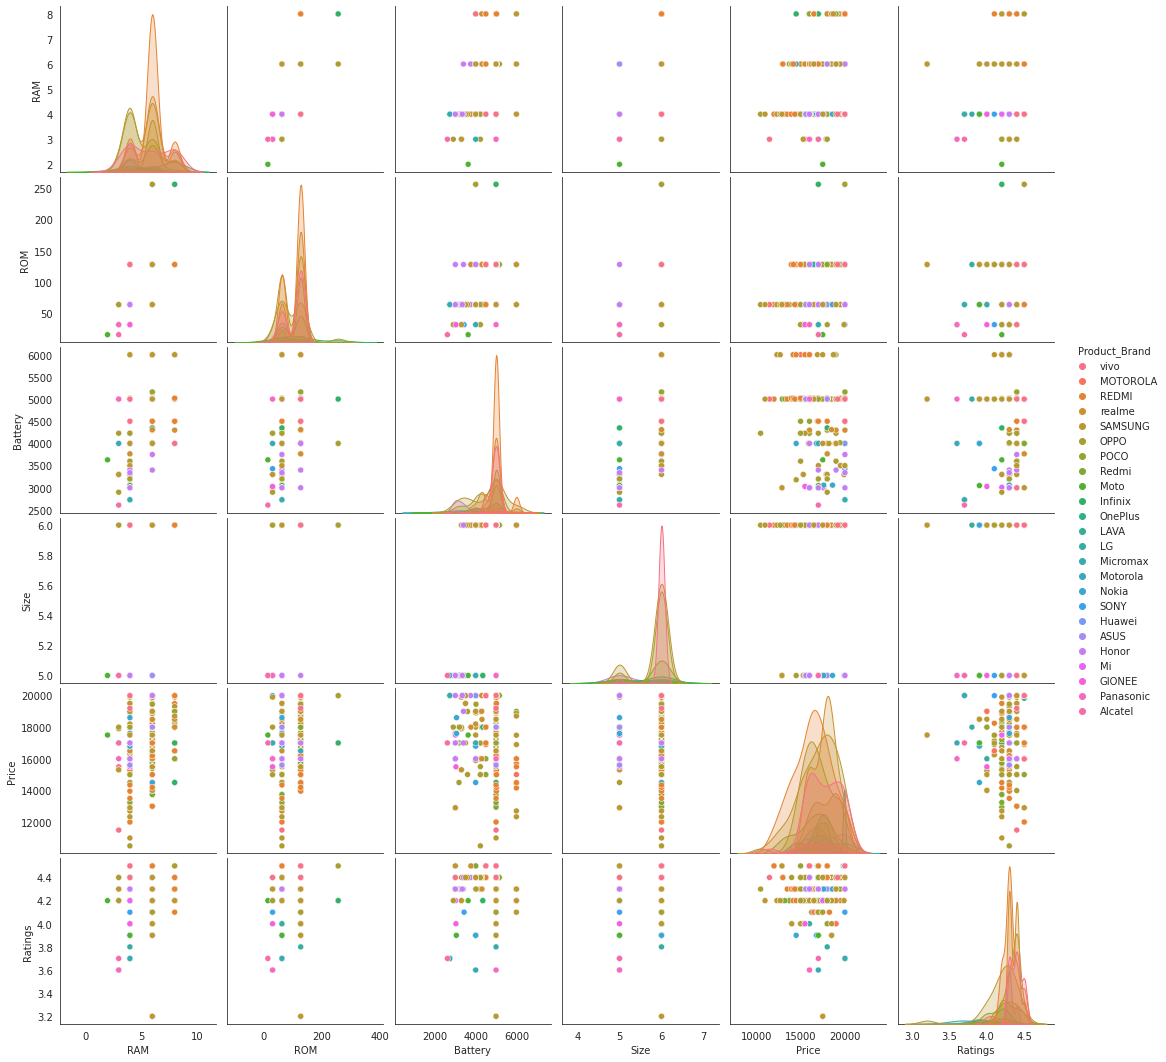

In [ ]:
sns.pairplot(data, hue='Product_Brand');

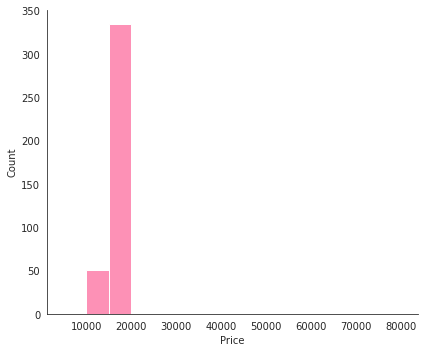

In [ ]:
sns.displot(data, x= 'Price',bins=[5000,10000,15000,20000,25000,30000,35000,40000,50000,60000,80000], aspect=1.2,color='#fd6c9e');

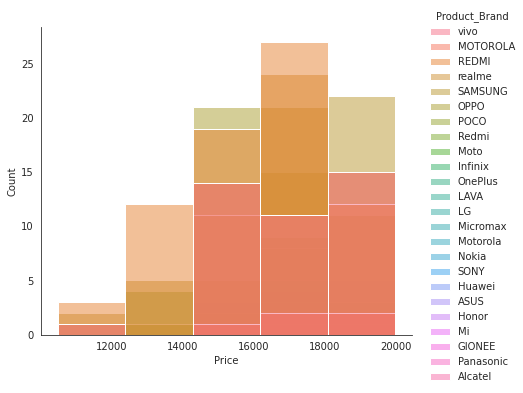

In [ ]:
sns.displot(data, x='Price',bins=5, hue='Product_Brand',aspect=1.2);

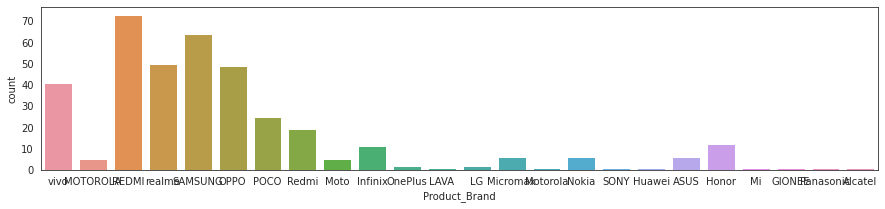

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
ax=sns.countplot(x="Product_Brand", data=data)

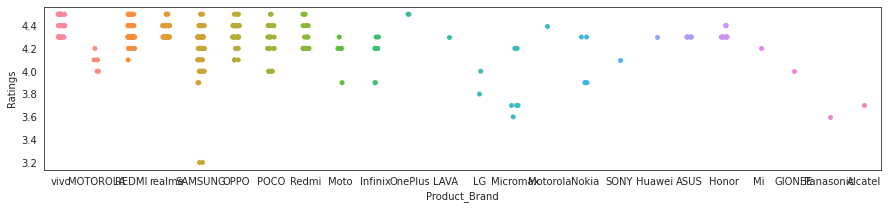

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Ratings", x="Product_Brand", data=data)

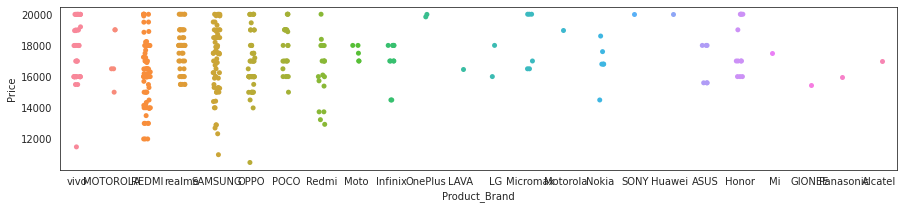

In [ ]:
fig, ax = plt.subplots(figsize=(15,3))
ax = sns.stripplot(y="Price", x="Product_Brand", data=data)

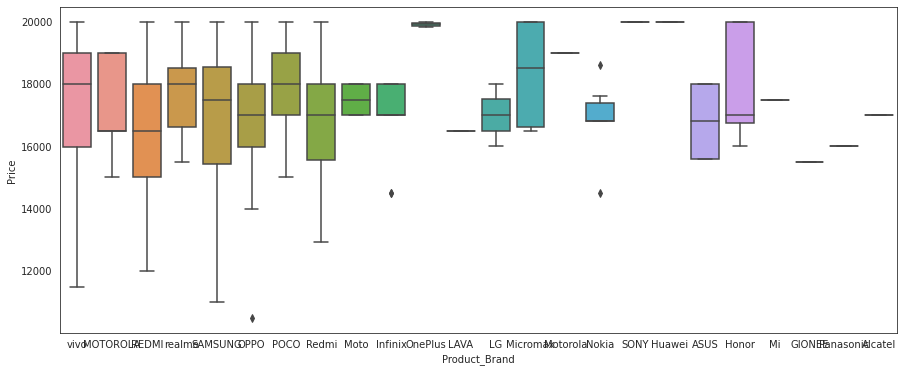

In [ ]:
fig, ax = plt.subplots(figsize=(15,6))
ax = sns.boxplot(x="Product_Brand", y="Price", data=data)

In [ ]:
# Brandwise Mean Selling prices
round(data.groupby('Product_Brand')['Price'].mean(),0).sort_values(ascending=False)

Product_Brand
Huawei       19990.0
SONY         19990.0
OnePlus      19909.0
Motorola     18999.0
Micromax     18332.0
Honor        17916.0
POCO         17853.0
realme       17709.0
vivo         17617.0
Mi           17499.0
Moto         17499.0
MOTOROLA     17199.0
SAMSUNG      17006.0
LG           17000.0
Alcatel      16999.0
Infinix      16999.0
OPPO         16894.0
Nokia        16849.0
ASUS         16799.0
LAVA         16499.0
Redmi        16379.0
REDMI        16353.0
Panasonic    16000.0
GIONEE       15490.0
Name: Price, dtype: float64

**INSIDES**

**1. Top 10 most smartphones selling brands in India at this price range**

In [ ]:
grouping_brands = data["Product_Brand"].value_counts(ascending=False)[0:10].reset_index()
grouping_brands.columns = ["Product_Brand", "Selling Values"]
grouping_brands

,Product_Brand,Selling Values
0,REDMI,73
1,SAMSUNG,64
2,realme,50
3,OPPO,49
4,vivo,41
5,POCO,25
6,Redmi,19
7,Honor,12
8,Infinix,11
9,Nokia,6


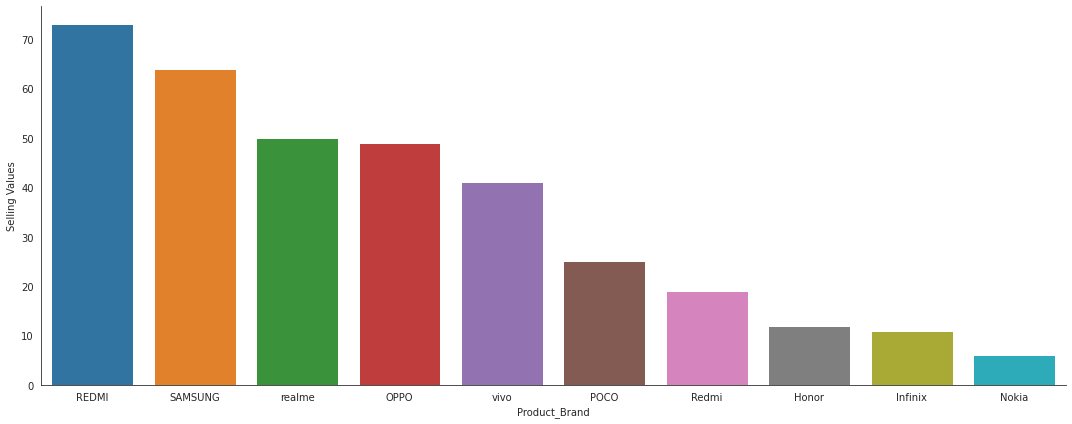

In [ ]:
sns.catplot(x="Product_Brand", y="Selling Values", kind="bar", data=grouping_brands, height=6, aspect=2.5);

**2. Most common specifications offered by various brands at this price range**

In [ ]:
RAM = data["RAM"].value_counts(ascending=False).reset_index()
ROM = data["ROM"].value_counts(ascending=False).reset_index()
RAM[0:1], ROM[0:1]

(   index  RAM
 0      6  187,    index  ROM
 0    128  227)

**3. Comparing Two best selling Smartphone brands in India Based on specs at this price range**

In [ ]:
comparing_by_specs1 = data[(data["Product_Brand"] == "SAMSUNG")]
comparing_by_specs2 = data[(data["Product_Brand"] == "REDMI")]
comparing_by_specs = pd.concat([comparing_by_specs1, comparing_by_specs2])
comparing_by_specs

,Product_Name,RAM,ROM,Battery,Size,Display,Camera,Price,Ratings,Product_Brand,Model
20,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)",6,128,5000,6,Full HD+ Display,50MP + 8MP + 2MP | 8MP Front Camera,16249,4.1,SAMSUNG,"Galaxy F23 5G (Copper Blush, 128 GB)"
25,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",6,128,5000,6,Full HD+ Display,50MP + 8MP + 2MP | 8MP Front Camera,16249,4.1,SAMSUNG,"Galaxy F23 5G (Aqua Blue, 128 GB)"
29,"SAMSUNG Galaxy F23 5G (Forest Green, 128 GB)",6,128,5000,6,Full HD+ Display,50MP + 8MP + 2MP | 8MP Front Camera,16249,4.1,SAMSUNG,"Galaxy F23 5G (Forest Green, 128 GB)"
56,"SAMSUNG Galaxy F23 5G (Aqua Blue, 128 GB)",4,128,5000,6,Full HD+ Display,50MP + 8MP + 2MP | 8MP Front Camera,15249,4.0,SAMSUNG,"Galaxy F23 5G (Aqua Blue, 128 GB)"
60,"SAMSUNG Galaxy F23 5G (Copper Blush, 128 GB)",4,128,5000,6,Full HD+ Display,50MP + 8MP + 2MP | 8MP Front Camera,15249,4.0,SAMSUNG,"Galaxy F23 5G (Copper Blush, 128 GB)"
...,...,...,...,...,...,...,...,...,...,...,...
408,"REDMI Note 8 Pro (Halo White, 128 GB)",6,128,4500,6,Full HD+ Display,64MP + 8MP + 2MP + 2MP | 20MP Front Camera,17999,4.5,REDMI,"Note 8 Pro (Halo White, 128 GB)"
411,"REDMI Note 9 Pro Max (Glacier White, 64 GB)",6,64,5020,6,Full HD+ Display,64MP + 8MP + 5MP + 2MP | 32MP Front Camera,17990,4.4,REDMI,"Note 9 Pro Max (Glacier White, 64 GB)"
413,"REDMI Note 8 Pro (Halo White, 128 GB)",6,128,4500,6,Full HD+ Display,64MP + 8MP + 2MP + 2MP | 20MP Front Camera,17999,4.5,REDMI,"Note 8 Pro (Halo White, 128 GB)"
418,"REDMI Note 9 Pro Max (Glacier White, 64 GB)",6,64,5020,6,Full HD+ Display,64MP + 8MP + 5MP + 2MP | 32MP Front Camera,17990,4.4,REDMI,"Note 9 Pro Max (Glacier White, 64 GB)"


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 24.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


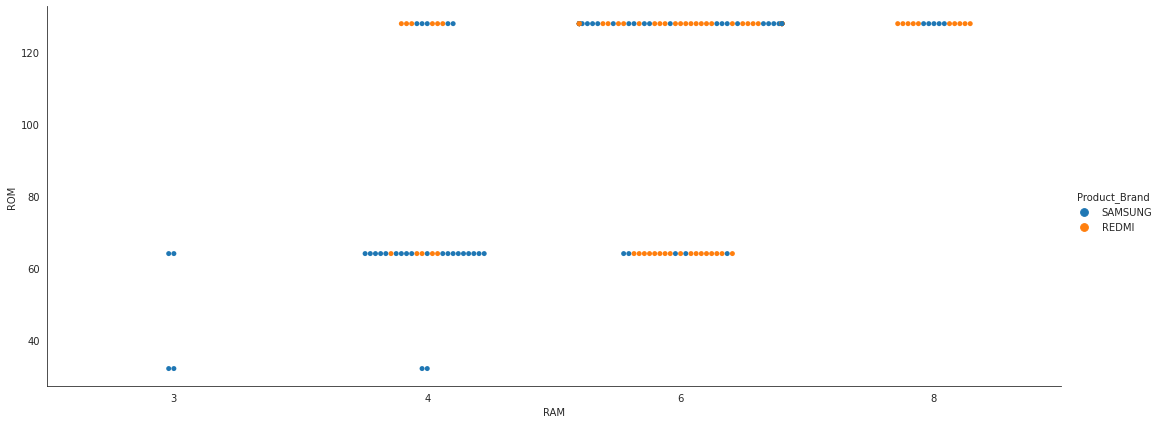

In [ ]:
sns.catplot(x="RAM", y="ROM", hue="Product_Brand", kind="swarm", data=comparing_by_specs,height=6, aspect=2.5);

**4. Top 10 Rated Phones in this price range**

In [ ]:
phone_rating = data.sort_values(by=["Ratings"], ascending=False)[:40]
phone_rating.groupby("Product_Name").mean()

,RAM,ROM,Battery,Size,Price,Ratings
Product_Name,,,,,,
"OPPO A5 (Diamond Blue, 64 GB)",4.0,64.0,4230.0,6.0,15990.0,4.4
"OPPO A54 (Moonlight Gold, 128 GB)",6.0,128.0,5000.0,6.0,15999.0,4.4
"OPPO A96 (Starry Black, 128 GB)",8.0,128.0,5000.0,6.0,19999.0,4.5
"OPPO A96 (Sunset Blue, 128 GB)",8.0,128.0,5000.0,6.0,19999.0,4.5
"OPPO Reno2 F (Lake Green, 256 GB)",6.0,256.0,4000.0,6.0,19990.0,4.5
"OPPO Reno2 F (Sky White, 256 GB)",6.0,256.0,4000.0,6.0,19990.0,4.5
"OnePlus Nord CE 2 Lite 5G (Black Dusk, 128 GB)",6.0,128.0,5000.0,6.0,19830.0,4.5
"OnePlus Nord CE 2 Lite 5G (Blue Tide, 128 GB)",6.0,128.0,5000.0,6.0,19988.0,4.5
"POCO X2 (Matrix Purple, 64 GB)",6.0,64.0,4500.0,6.0,14999.0,4.5


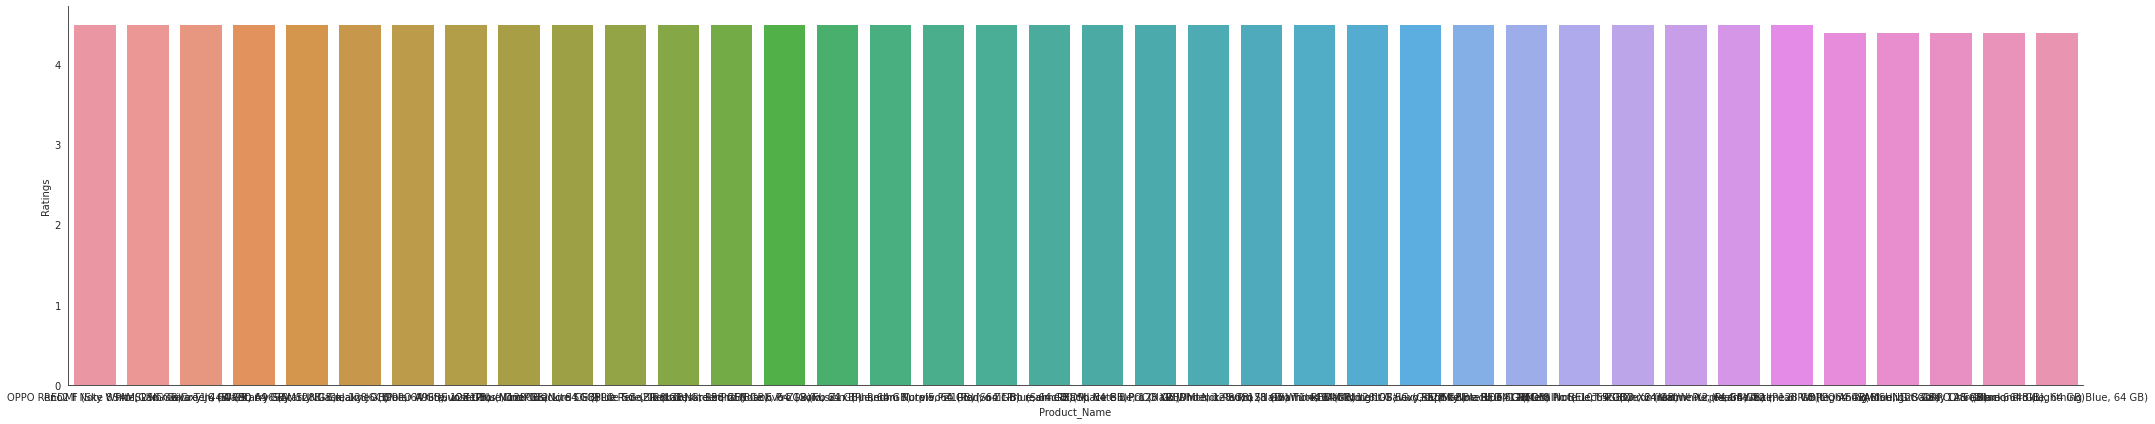

In [ ]:
sns.catplot(x="Product_Name", y="Ratings", kind="bar", data=phone_rating, height=6, aspect=5);